In [101]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Read the Data 

In [102]:
#import the data
bike = pd.read_csv('day.csv')

In [103]:
#Read the data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [104]:
# Check shape of dataframe
bike.shape

(730, 16)

In [105]:
#checking information 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Non of the column has null value, so no need toh handle missing values. 

### We dont have missing values
### Check for duplicates 

In [106]:
#checking duplicates
bike[bike.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


- No duplicate records found 

### Data Cleaning


- Drop columns that are not useful for data analysis or are redundant as per data dictionary description
- instant:as it is the record index
- dteday: as the features of date are alreeady there like yr month and weekday
- casual and registered as the are in cnt, because cnt is sum of both the values

In [107]:
#Dropping above columns 
bike.drop(['dteday', 'instant', 'casual', 'registered'], axis =1, inplace=True)

In [108]:
bike.shape

(730, 12)

In [109]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data visualization 

##### Visualising Numeric Variables. 

In [110]:
# creating a catagory of numerical variables only 
bike_numerical = ['temp','atemp', 'hum', 'windspeed', 'cnt' ]

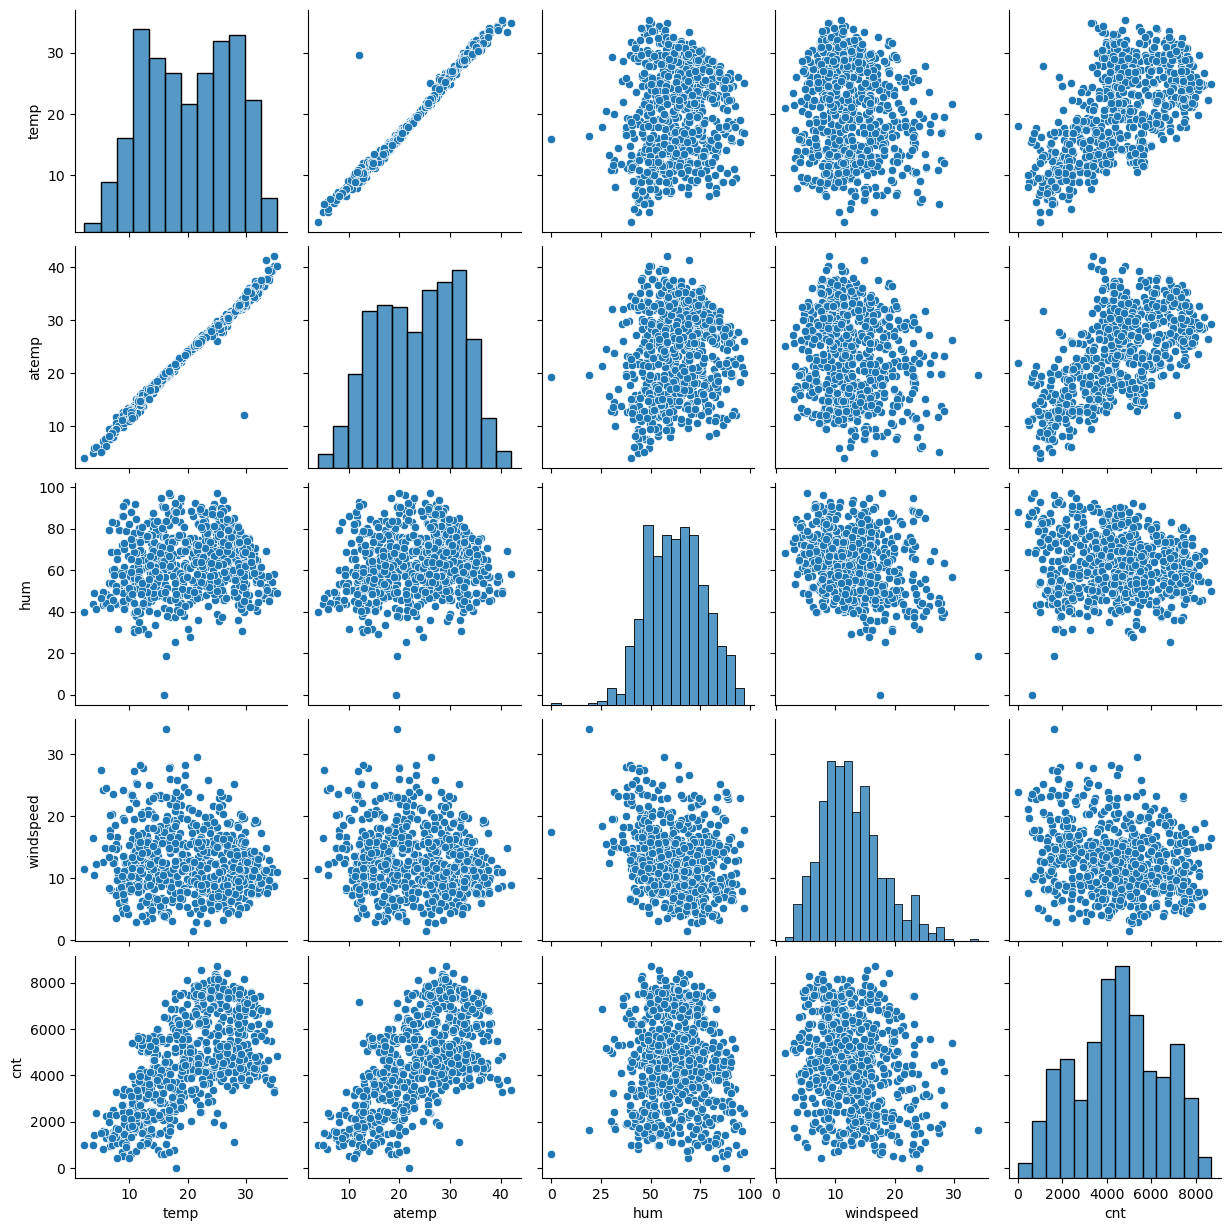

In [111]:
sns.pairplot(data = bike, vars= bike_numerical)
plt.show()

- Observations : 
- temp and atemp are highly corelated, but will check it further which one to consider for further analysis
- temp and cnt (target variable) has some linear relation 

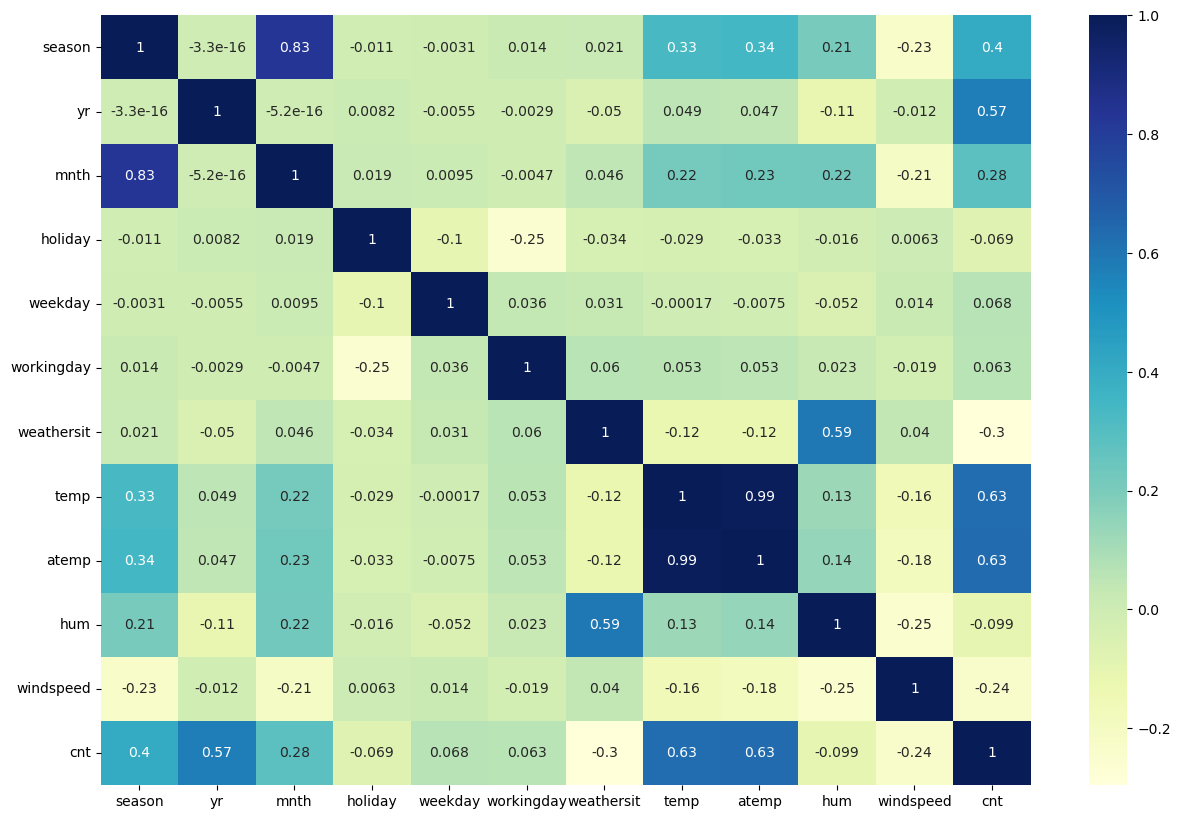

In [112]:
plt.figure(figsize=(15,10))
sns.heatmap(bike.corr(),cmap="YlGnBu",annot=True)
plt.show()

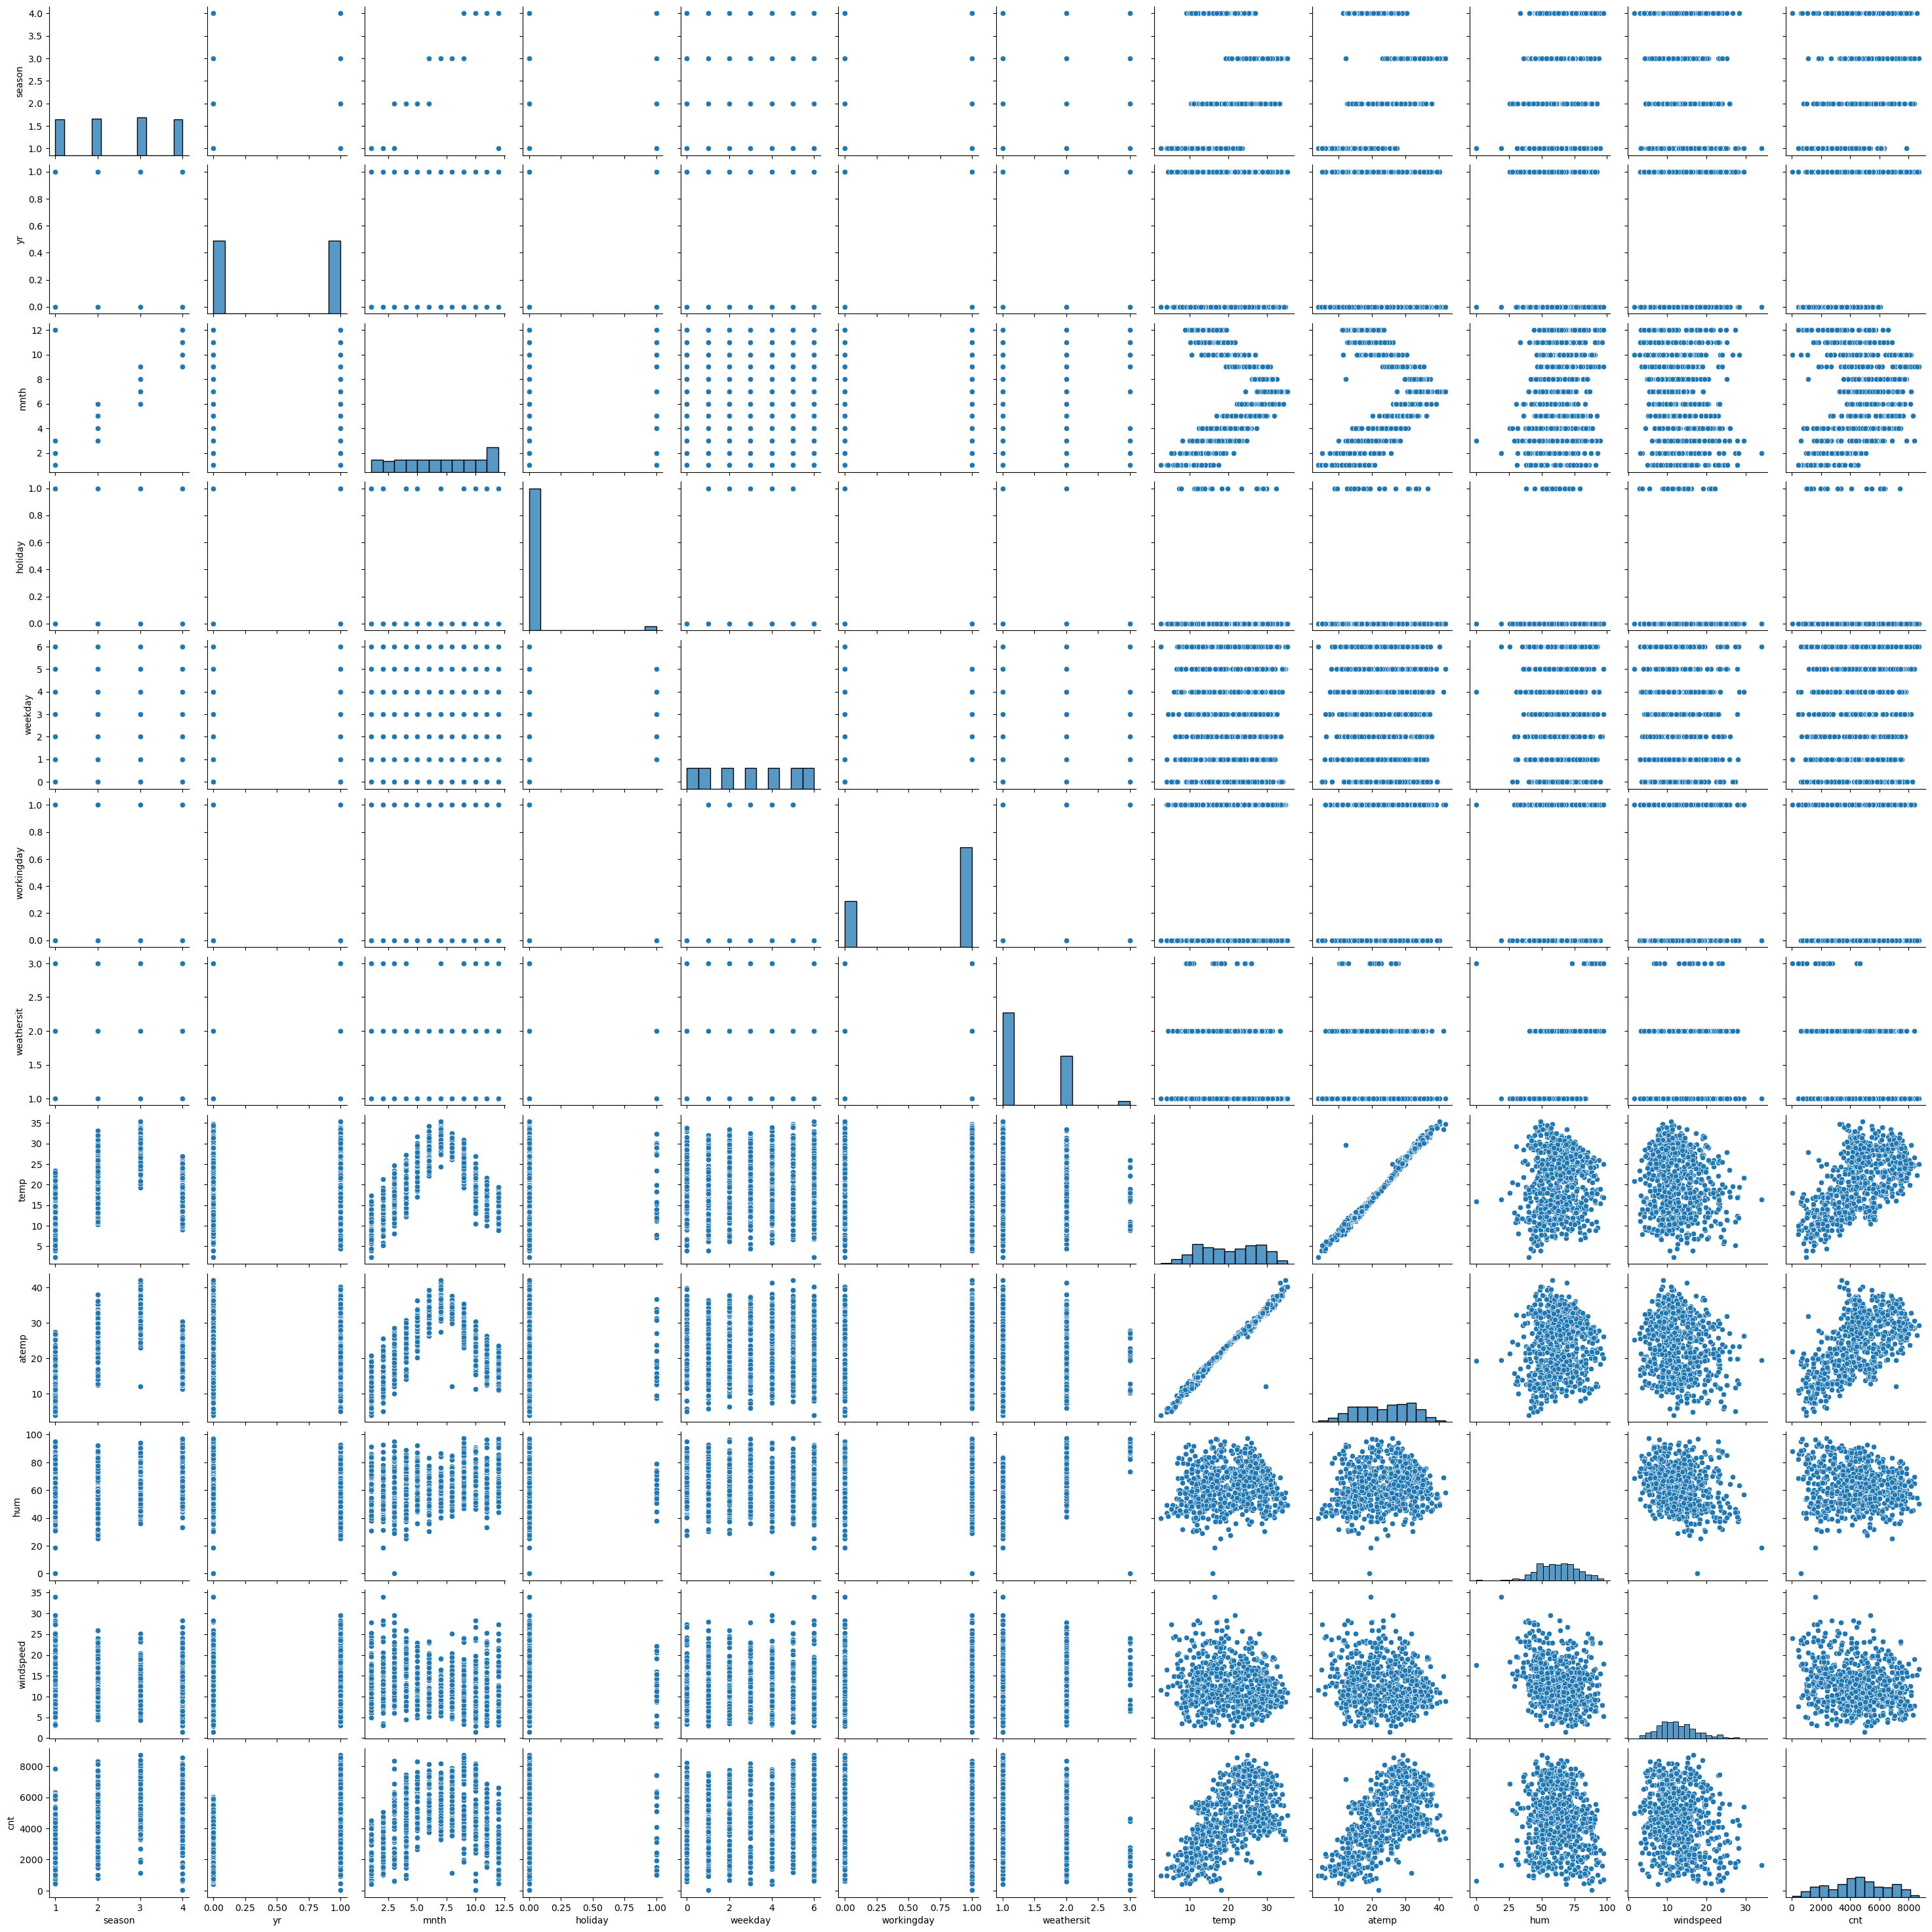

In [113]:
sns.pairplot(bike)
plt.show()

##### Visualising Categorical Variables

- As per data dictonary catagorical columns has some specification related to encoding.
- Decoding the values as per data dictionary as it will be more meaningful.

In [114]:
#mapping season with codes
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

#mapping year with codes
#bike['yr'] = bike['yr'].map({0: 2018, 1:2019})

#mapping month with codes
bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#mapping weekday with codes
bike['weekday'] = bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

#mapping weathersit with codes
bike['weathersit'] = bike['weathersit'].map({1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'})

In [115]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [116]:
Bike_catagorical = ['season','yr', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit' ]

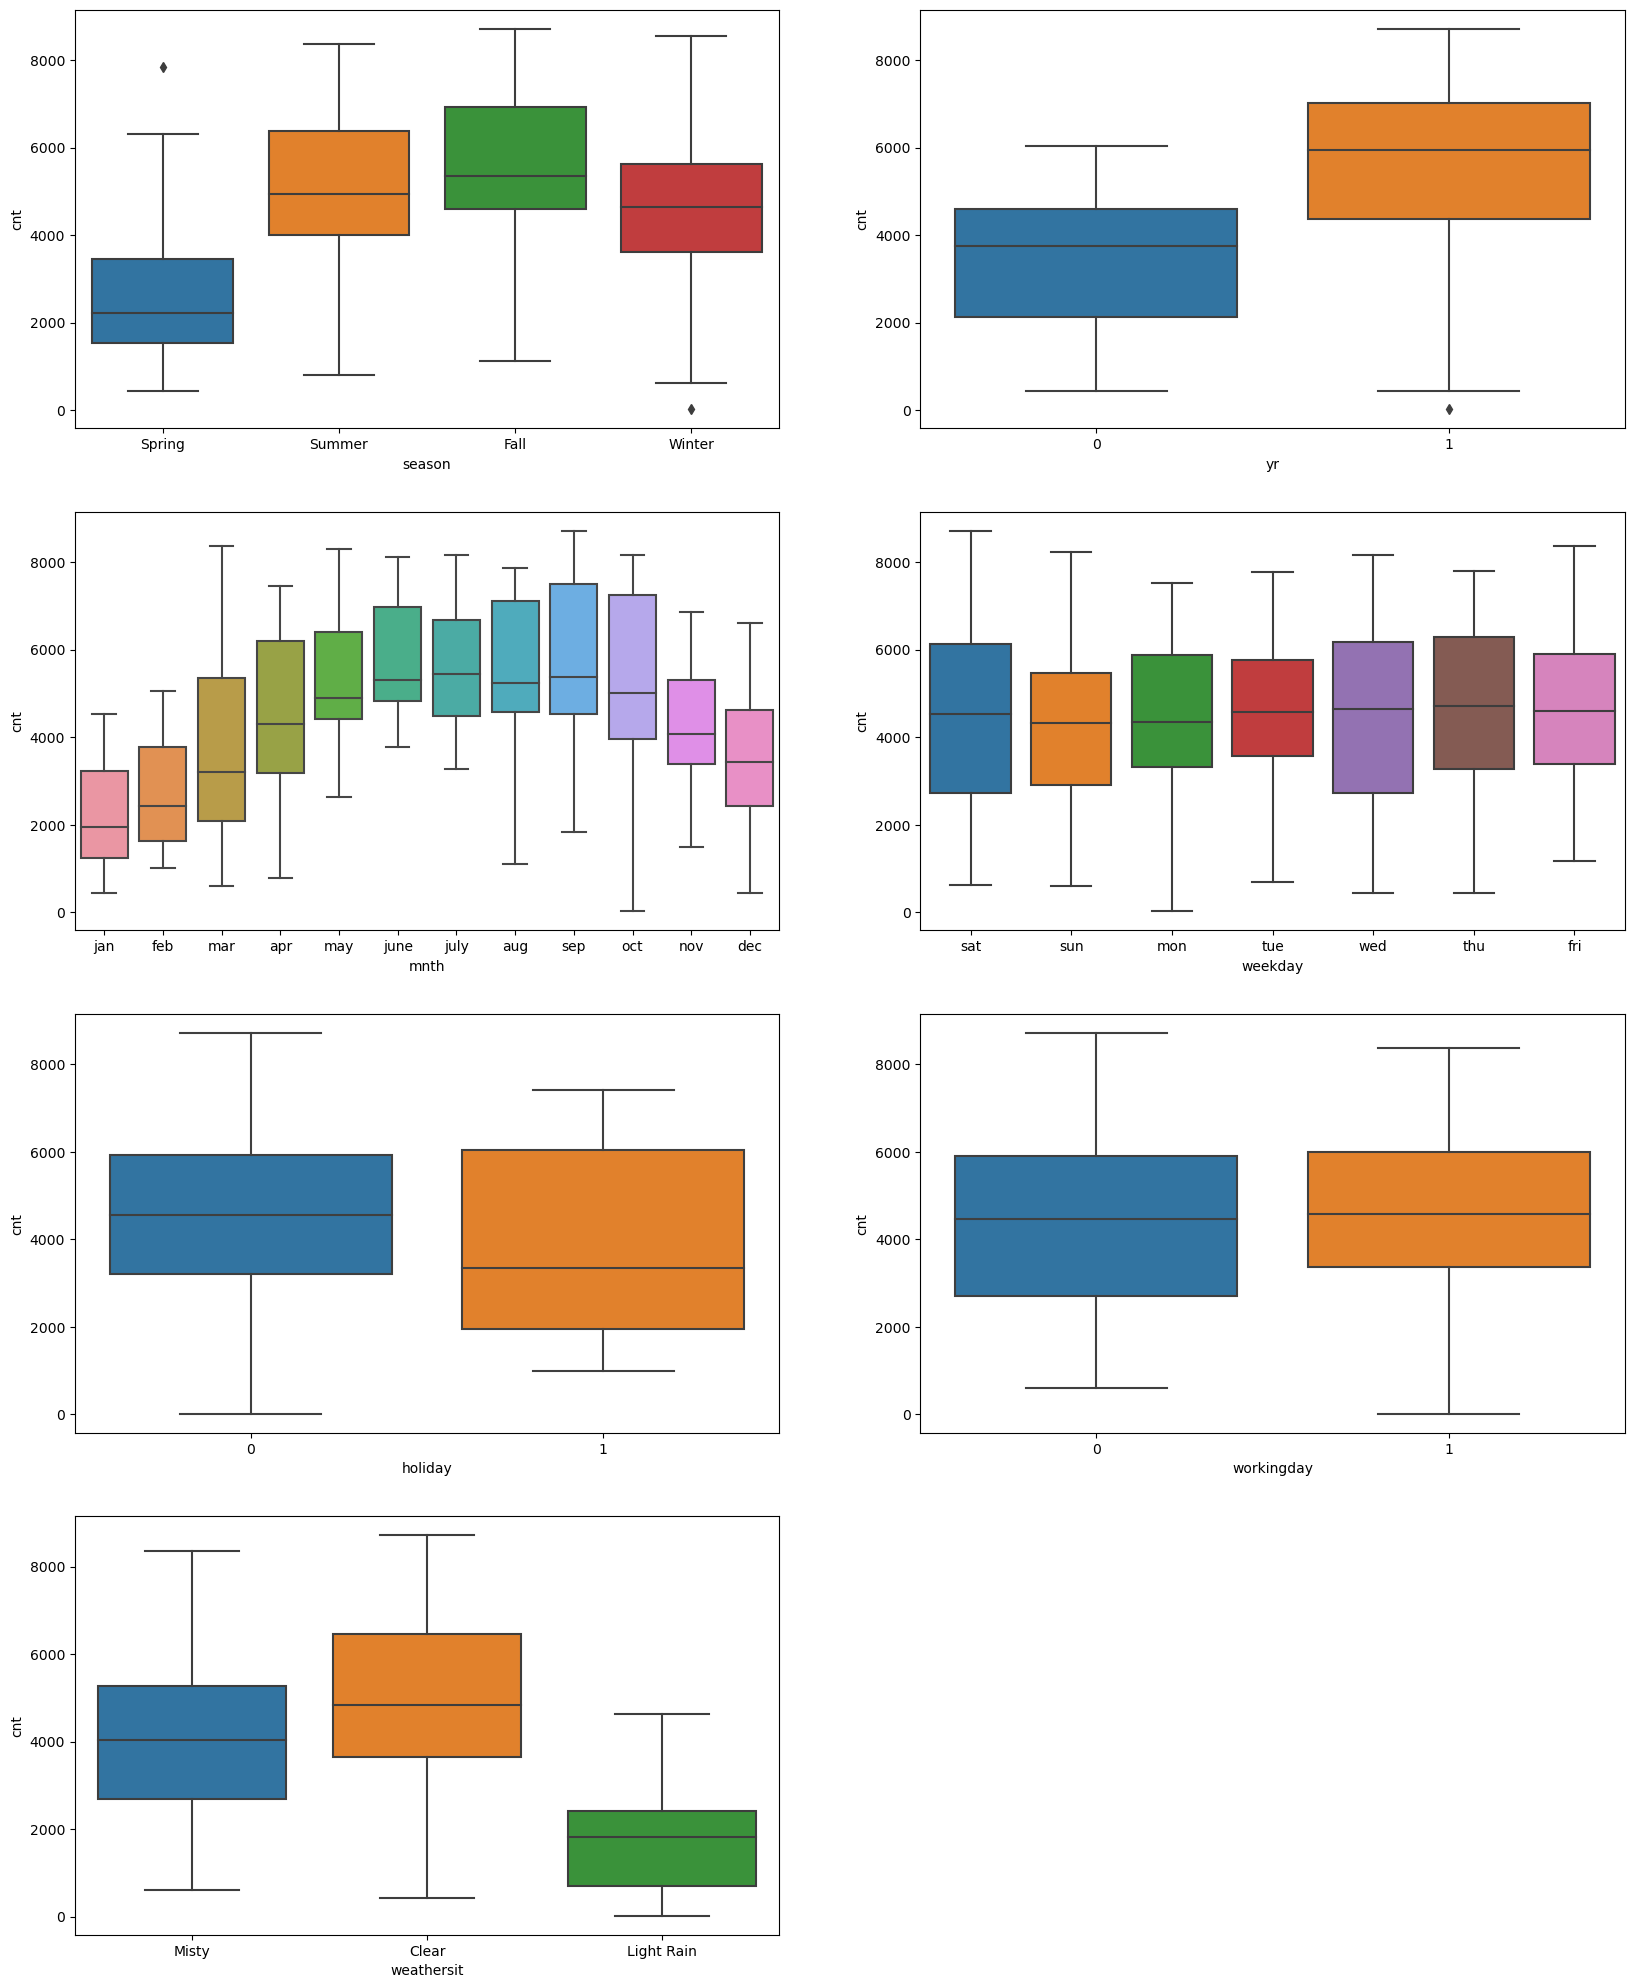

In [117]:
plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.boxplot(data = bike, x='season', y='cnt')

plt.subplot(4,2,2)
sns.boxplot(data = bike, x='yr', y='cnt')

plt.subplot(4,2,3)
sns.boxplot(data = bike, x='mnth', y='cnt')

plt.subplot(4,2,4)
sns.boxplot(data = bike, x='weekday', y='cnt')

plt.subplot(4,2,5)
sns.boxplot(data = bike, x='holiday', y='cnt')

plt.subplot(4,2,6)
sns.boxplot(data = bike, x='workingday', y='cnt')

plt.subplot(4,2,7)
sns.boxplot(data = bike, x='weathersit', y='cnt')


plt.show()

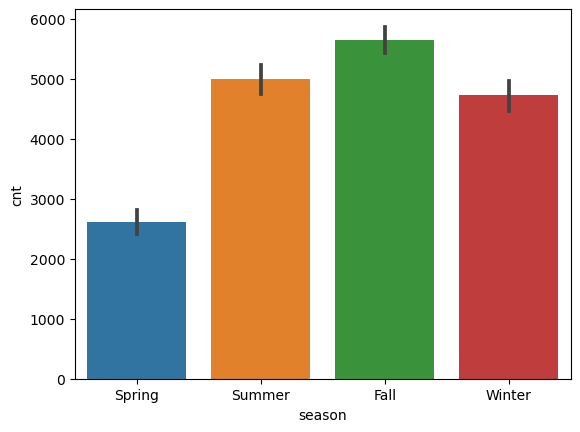

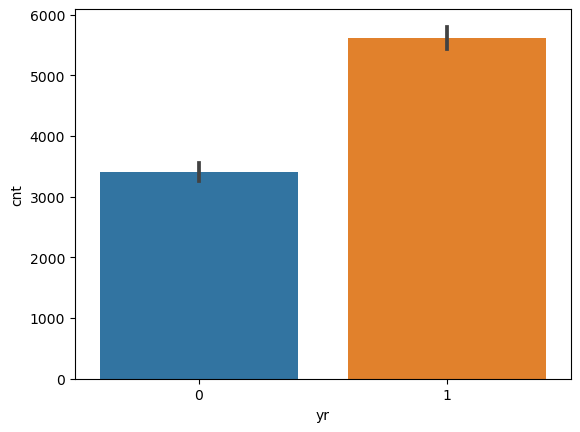

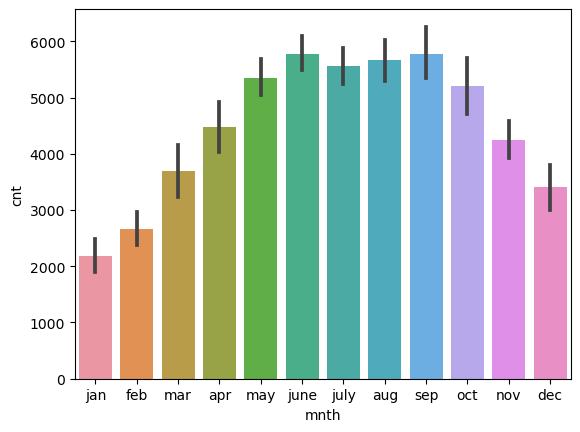

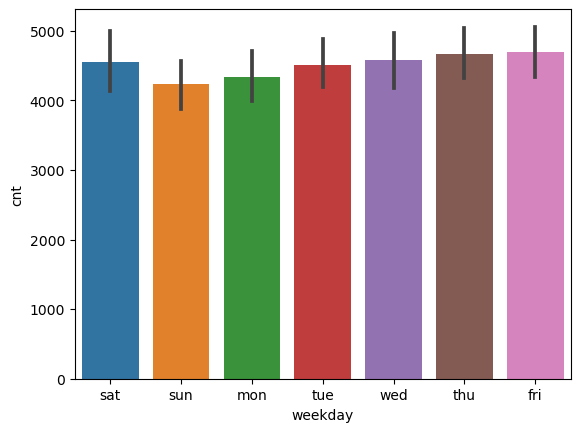

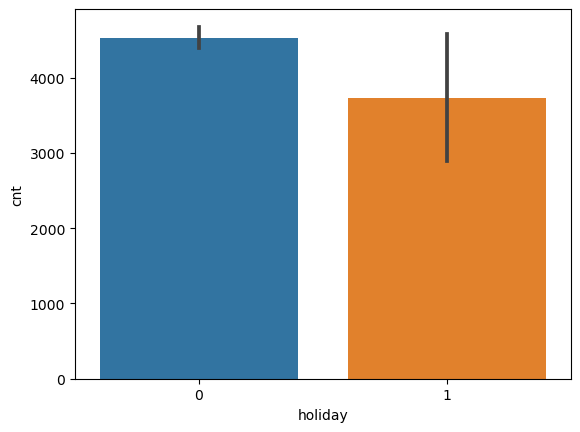

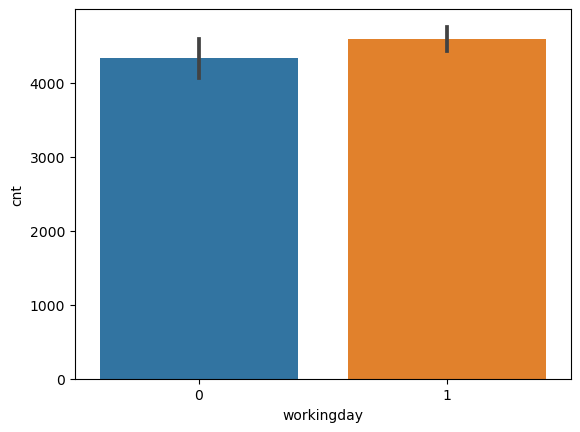

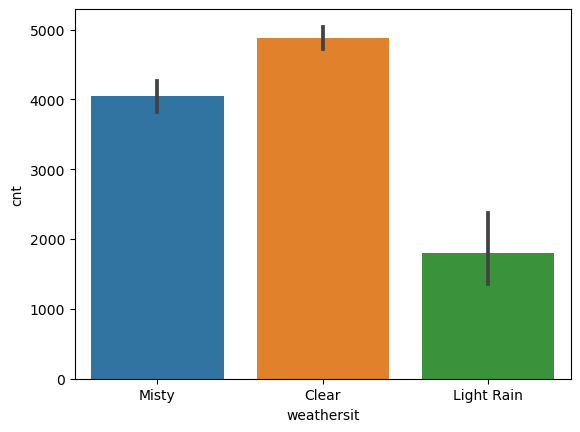

In [118]:
for i in Bike_catagorical:
    sns.barplot(data = bike, x=i, y='cnt' )
    plt.show()

- Insights : 
    - Clear wather has more rental
    - from May to Sept bike rental is higher
    - Bike renting increasing with year
    - Fall season has maximum rentals

### Data Preparation 

#### Creating Dummy Variables

In [119]:
#creating dummy variables for all catagorical levels using drop first  
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)
#creating dummy variables for weathersit for all catagorical levels without drop first to reatin information
#bike = pd.get_dummies(data=bike,columns=["weathersit"])


In [120]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

### Splitting the Data into Training and Testing Sets

In [122]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [123]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [124]:
#Check shape of train set 
bike_train.shape

(510, 30)

In [125]:
#Check shape of test set 
bike_test.shape

(219, 30)

### Rescaling the Features
##### We will use MinMax scaling.

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [127]:
#Describing and checking all numeriacl variables max values
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
# Numerical Variable Columns that should be scaled directly

bike_num_scale = ['temp', 'atemp','hum', 'windspeed', 'cnt' ]

In [129]:
#Scaling using MinMax scaler object
bike_train[bike_num_scale] = scaler.fit_transform(bike_train[bike_num_scale])
bike_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,0,0,...,0,0,0,1,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,1,...,0,0,0,0,0,0,0,1,0,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,1,...,0,0,0,0,0,0,0,1,0,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,1,...,0,0,0,0,0,0,0,1,0,1


#### Dividing into X and Y sets for the model building

In [130]:
#cnt is our target variable 
y_train = bike_train.pop('cnt')
X_train = bike_train

In [131]:
y_train.shape

(510,)

In [132]:
X_train.shape

(510, 29)

### Building  model
##### we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
#### Then we will manually check and statistics wrt to model accuracy and requiremnt 

#### RFE

In [133]:
#Importing RFE and LinerRegression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [134]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
#Creating a model using RFE with 15 features 
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [136]:
#Checking staus and rankings of variables
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
22,weekday_sat,True,1
20,mnth_sep,True,1
27,weathersit_Light Rain,True,1
13,mnth_jan,True,1
9,season_Winter,True,1
8,season_Summer,True,1
14,mnth_july,True,1
6,windspeed,True,1
1,holiday,True,1


In [137]:
#coulmns which are not part of rfe model
X_train.columns[~rfe.support_]


Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [138]:
#columns which are part of rfe model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_jan',
       'mnth_july', 'mnth_sep', 'weekday_sat', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [139]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = X_train[col]


In [140]:
#importing statsmodel and VIF calculator

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Adding a constant variable 
x_train_sm = sm.add_constant(x_train_rfe)

In [142]:
#Creating model using OLS
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()


In [143]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.31e-191
Time:                        14:45:48   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [144]:
# VIF calculation
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_sat,1.98


- mnth_jan has high p value, lets remove it and recheck stats of our model 

In [145]:
x_train_rfe = x_train_rfe.drop(['mnth_jan'], axis=1)

In [146]:
#Creating another model model using OLS after removing mnth_nov column as its having high p value 
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.13e-191
Time:                        14:46:39   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [147]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,season_Spring,4.24
8,season_Winter,3.44
7,season_Summer,2.83
13,weathersit_Misty,2.28
0,yr,2.08
11,weekday_sat,1.97


- All p  vlues looks good but we can see there is high VIF for hum, lets remove it and build again

In [148]:
x_train_rfe = x_train_rfe.drop(['hum'], axis=1)

In [149]:
#Creating another model model using OLS after removing weathersit_Clear column as its having high VIF 
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 01 May 2023   Prob (F-statistic):          5.73e-189
Time:                        14:47:23   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [150]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_Spring,2.49
6,season_Summer,2.32
0,yr,2.07
7,season_Winter,1.99
10,weekday_sat,1.96
8,mnth_july,1.58
12,weathersit_Misty,1.56


- holiday has slightly high p value.

In [151]:
x_train_rfe = x_train_rfe.drop(['holiday'], axis=1)

In [152]:
#Creating another model model using OLS after removing weathersit_Clear column as its having high VIF 
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 01 May 2023   Prob (F-statistic):          3.28e-189
Time:                        14:48:20   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [153]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_Spring,2.38
5,season_Summer,2.31
0,yr,2.07
6,season_Winter,1.92
9,weekday_sat,1.83
7,mnth_july,1.58
11,weathersit_Misty,1.56


- All p  vlues looks good but we can see there is high VIF for temp, lets drop temp and calculate stats again.

In [154]:
x_train_rfe = x_train_rfe.drop(['temp'], axis=1)

In [155]:
#Creating another model model using OLS after removing weathersit_Clear column as its having high VIF 
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 01 May 2023   Prob (F-statistic):          4.11e-150
Time:                        14:48:44   Log-Likelihood:                 410.99
No. Observations:                 510   AIC:                            -798.0
Df Residuals:                     498   BIC:                            -747.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

In [156]:
#calculating VIF for current columns
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.16
1,workingday,3.54
3,season_Spring,2.25
4,season_Summer,2.25
5,season_Winter,1.92
0,yr,1.91
8,weekday_sat,1.62
10,weathersit_Misty,1.55
6,mnth_july,1.29
7,mnth_sep,1.22


- mnth_july is now having high p value 

In [157]:
#dropping mnth_july column as it having high p value
x_train_rfe = x_train_rfe.drop(['mnth_july'], axis=1)

In [158]:
#Creating another model model using OLS after removing weathersit_Clear column as its having high VIF 
x_train_sm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_sm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 01 May 2023   Prob (F-statistic):          3.40e-151
Time:                        14:49:10   Log-Likelihood:                 410.90
No. Observations:                 510   AIC:                            -799.8
Df Residuals:                     499   BIC:                            -753.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

In [159]:
#calculating VIF for current columns
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.99
1,workingday,3.29
3,season_Spring,2.00
4,season_Summer,1.99
0,yr,1.88
5,season_Winter,1.73
7,weekday_sat,1.56
9,weathersit_Misty,1.55
6,mnth_sep,1.18
8,weathersit_Light Rain,1.08


- Now all the p values looks good and VIF is also fine 
- F-statistic is also near to zero
- AIC and BIC is good 
- Adjusted r2 is also fine


In [177]:
#Cofficient of variables
lm.params

const                    0.530199
yr                       0.247461
workingday               0.056570
windspeed               -0.172168
season_Spring           -0.296857
season_Summer           -0.041530
season_Winter           -0.073040
mnth_sep                 0.072193
weekday_sat              0.064009
weathersit_Light Rain   -0.301168
weathersit_Misty        -0.092120
dtype: float64

In [179]:
lm.params.sort_values()

weathersit_Light Rain   -0.301168
season_Spring           -0.296857
windspeed               -0.172168
weathersit_Misty        -0.092120
season_Winter           -0.073040
season_Summer           -0.041530
workingday               0.056570
weekday_sat              0.064009
mnth_sep                 0.072193
yr                       0.247461
const                    0.530199
dtype: float64

### Residual Analysis of the train data

In [161]:
#pridicting target data on train set
y_train_pred = lm.predict(x_train_sm)

In [162]:
#calculating diff of predicted and actual 
res = (y_train - y_train_pred)

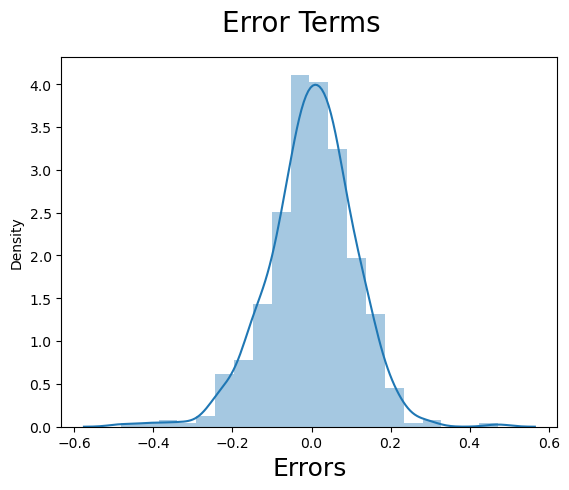

In [163]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot( res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Error is normally distributed and looks concentrated to zero.

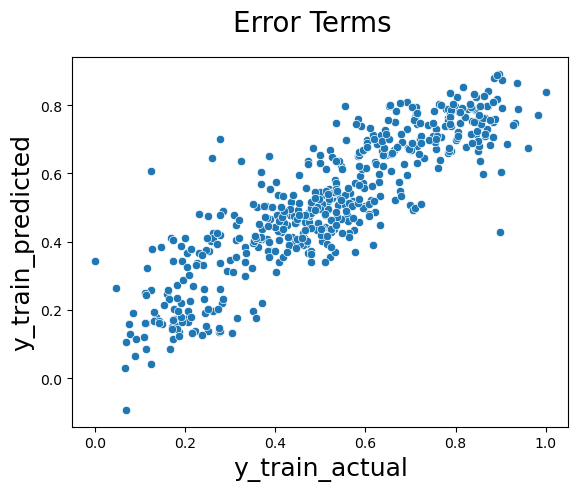

In [164]:
fig = plt.figure()
sns.scatterplot( x=y_train , y = y_train_pred)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train_actual', fontsize = 18)
plt.ylabel('y_train_predicted', fontsize = 18)
plt.show()

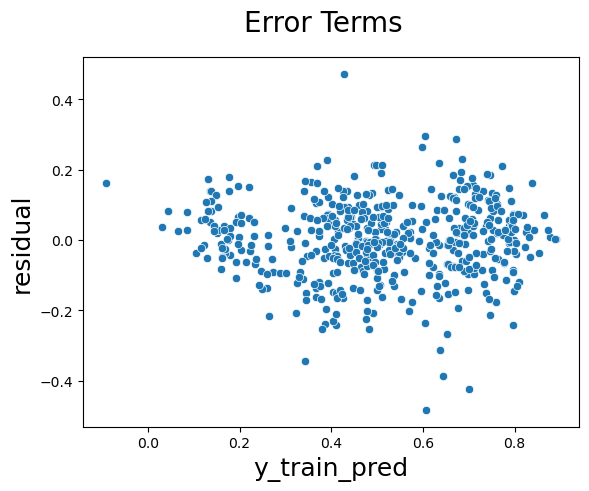

In [176]:
fig = plt.figure()
sns.scatterplot( x=y_train_pred, y = res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train_pred', fontsize = 18)
plt.ylabel('residual', fontsize = 18)
plt.show()

- No heteroscedasticity observed, residuals have constant variance at every level of x

### Model Predictions on test set

#### Applying the scaling on the test sets

In [166]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [167]:
#Trasforming using sclaer object created of MinMax scaler 
bike_test[bike_num_scale] = scaler.transform(bike_test[bike_num_scale])

#### Dividing into X_test and y_test

In [168]:
# As cnt is our target variable
y_test = bike_test.pop('cnt')
x_test = bike_test

In [169]:
y_test.shape

(219,)

In [170]:
x_test.shape

(219, 29)

In [171]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_rfe.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [172]:
#Making prediction

y_test_pred = lm.predict(x_test_new)

#### Model Evaluation

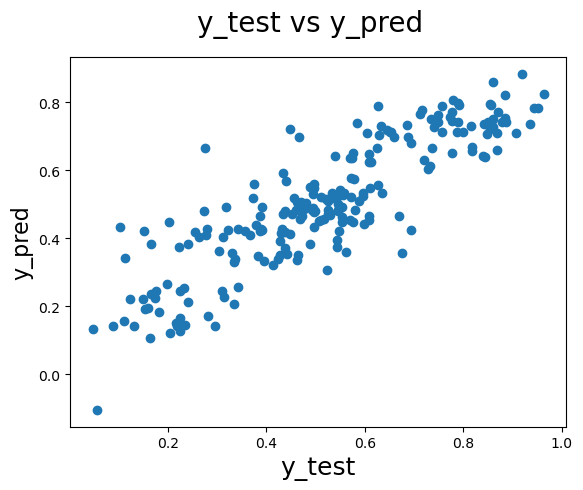

In [173]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Generating R-Square

In [174]:
from sklearn.metrics import r2_score,mean_squared_error

In [175]:
### Calculating R2 for test dataset

r2_score(y_test,y_test_pred)

0.7503732169558834

- train R2 (0.763) and test R2 ( 0.750) is quite near to each other, means our model pridection is good